In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [3]:
#2. Load dataset from OpenML
data = fetch_openml('creditcard', version=1, as_frame=True)
df = data.frame

# Display the first five rows to get a sense of the data
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Understanding the Credit Card Dataset:
The creditcard dataset contains transactions made by credit cards. Each transaction is a row in the dataset, and the details of each transaction are in the columns. In the context of this dataset, the crucial piece of information we want to find out is whether a transaction is fraudulent or not.

### What are the V1-V28 Features?
In the dataset, you see columns labeled V1 through V28. These aren't the actual, raw data from the credit card transactions. Instead, they've been transformed through a process called PCA, which stands for Principal Component Analysis. Here's what that means:

1. Privacy Concerns: Credit card transaction data is sensitive because it contains personal information. To protect the privacy of individuals, it’s crucial to anonymize the data before it can be used for analysis.
2. Dimensionality Reduction: The original data might have had a lot of different features (like where the purchase was made, the time, the amount, etc.), which could be challenging to work with and might not all be equally important.
3. Principal Component Analysis (PCA): PCA is a statistical technique that helps in such situations. It takes all the original features and transforms them into a new set of features. These new features (the V columns in your dataset) are the "principal components" that are generated in such a way that the first few retain most of the important information from all the original features. They're constructed to be independent of one another, which is a nice property that often makes models work better.

### How Do the V1-V28 Features Link to the 'Amount'?
The Amount column in the dataset represents the transaction amount, which is a direct figure — how much money was involved in the transaction. Unlike the V1-V28 features, Amount hasn’t been transformed through PCA and is the actual, raw data.

The V1-V28 features and the Amount are related only in the sense that they all describe aspects of the same transaction. The V features capture the underlying patterns and characteristics of the transaction (minus the amount), while the Amount tells us its monetary value. In fraud detection, it’s useful to look at both these sets of information because both the transaction’s characteristics and the amount could potentially be indicators of fraudulent activity.

### Why is PCA Used?
- Anonymization: It hides any sensitive information contained in the original features.
- Efficiency: It reduces the number of features, making computations more manageable, especially if there were hundreds or thousands of original features.
- Performance: By focusing on the most informative patterns, it can actually help machine learning models perform better by emphasizing the most significant signals in the data.


So, in summary, when you’re working with the creditcard dataset, the V1-V28 features give you a processed, privacy-safe, and compact representation of the original transaction data, while the Amount gives you the transaction’s monetary value. Together, these pieces of information are used to determine whether a transaction is likely to be fraudulent.


In [4]:
# Checking the balance of classes in your target variable, Class. 
# Crucial step before proceeding with building a machine learning model, especially with algorithms like RandomForestClassifier. 
class_counts = df['Class'].value_counts()
print(class_counts)

# Calculating the percentage of each class
class_percentages = class_counts / len(df) * 100
print(class_percentages)

0    284315
1       492
Name: Class, dtype: int64
0    99.827251
1     0.172749
Name: Class, dtype: float64


### Documentation: Load Dataset Step
#### Observation:
Upon loading the creditcard dataset from the OpenML repository, the following observations can be made:

- The dataset consists of transactions made by credit cards, where each row represents a transaction.
- There are 30 columns in total, with 28 being the result of a PCA transformation (V1 to V28), which anonymizes and reduces the dimensionality of the original features while retaining the essential information.
- The Amount column represents the transaction amount. This feature is not normalized.

The Class column is the response variable, indicating whether the transaction was fraudulent (1) or not (0).
The dataset provides an excellent example of real-world data where dimensionality reduction has already been applied to preserve user privacy. It's imbalanced, which is common in fraud detection scenarios, where fraudulent transactions are rarer than legitimate ones.

In [5]:
#3. Preprocess Data
# Drop the 'Class' column to isolate the features
X = df.drop('Class', axis=1)

# Isolate the 'Class' column to use as the target variable
y = df['Class']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features, not including the target variable
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first five rows of the scaled features
X_scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


### Documentation: Preprocess Data Step
#### Observation:
The raw dataset requires preprocessing before it can be fed into a machine learning model:

- The features V1 to V28 are already scaled as a result of PCA, but the Amount feature is not. It varies significantly in magnitude which could potentially bias a machine learning algorithm.
- The Class variable is the target for our predictive modeling task. It's separate from the input features.

#### Why Preprocessing:
Preprocessing is a critical step to ensure that the machine learning model receives the data in a suitable format, improving its ability to learn and make predictions. Specifically:

- Feature Scaling: Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. StandardScaler standardizes features by removing the mean and scaling to unit variance.
- Separating Features and Target: We need to separate the input features (X) from the target variable (y) as they serve different purposes in model training and evaluation.

#### What Kind of Preprocessing:

- Standard Scaling: The Amount variable will be scaled using StandardScaler to ensure that all features contribute equally to the result.
- Feature-Target Split: The dataset is split into input features (X) and the target variable (y), where X contains all columns except for Class, and y is just the Class column.

In [6]:
#4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 227845, Test set size: 56962


In [7]:
#5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


### Documentation: Train Model Step
#### Objective:
To develop a predictive model capable of distinguishing between legitimate and fraudulent transactions.

#### Model Selection:
Random Forest Classifier was chosen due to its proficiency in handling imbalanced datasets, like our credit card transactions, where fraudulent cases are much fewer than legitimate ones.

#### Training Process:

- Random Forest: An ensemble learning method that operates by constructing a multitude of decision trees. It outputs the mode of the classes (classification) of the individual trees.
- Number of Estimators: Set to 100, implying that the model uses 100 individual decision trees to make its predictions, a number chosen to balance between computational efficiency and model performance.
- Random State: Set to 42 to ensure reproducibility of the results; the same random seed allows the model to produce the same results on each run.

In [8]:
# Evaluate model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Documentation: Evaluate Model Step
#### Objective:
To assess the trained model's ability to accurately predict fraudulent transactions on unseen data.

#### Evaluation Metrics:

- Accuracy: Measures the proportion of true results among the total number of cases examined. Given the high score, the model is highly accurate overall.
- Precision (for Class 1): Indicates the proportion of positive identifications that were actually correct; a precision of 0.97 means that when the model predicts a transaction is fraudulent, it is correct 97% of the time.
- Recall (for Class 1): Describes the model's ability to capture actual positive cases; a recall of 0.77 for the fraudulent transactions implies the model correctly identifies 77% of all fraudulent transactions.
- F1-Score (for Class 1): Combines precision and recall into a single metric, which is particularly useful for imbalanced classes; an F1-score of 0.86 is quite high, indicating a good balance between precision and recall.
- Support: The number of actual occurrences of each class in the specified dataset; for instance, there were 98 actual fraudulent transactions.

#### Observation:
The model exhibits excellent overall performance, but given the context of fraud detection, the focus should especially be on the recall for Class 1, which could be improved. While the accuracy is exceptionally high, this metric can be misleading in imbalanced datasets where the majority class (legitimate transactions) dominates. Therefore, precision, recall, and the F1-score for the fraudulent class (Class 1) are more crucial indicators of performance.

#### Insights:
The relatively lower recall for Class 1 suggests room for improvement, perhaps by tuning hyperparameters, gathering more diverse training data, or trying alternative anomaly detection techniques. It's critical to improve recall for Class 1 in fraud detection scenarios to ensure that fraudulent transactions are not missed, as the cost of missing a fraudulent transaction can be high.

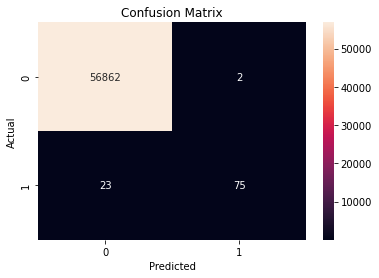

In [9]:
# Visualization of results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The specific terms of a confusion matrix are:

- True Positives (TP): The cases in which the model correctly predicted the positive class.
- True Negatives (TN): The cases in which the model correctly predicted the negative class.
- False Positives (FP): The cases in which the model incorrectly predicted the positive class.
- False Negatives (FN): The cases in which the model incorrectly predicted the negative class.

Based on the layout of the confusion matrix (which typically follows the format of [[TN, FP], [FN, TP]]):

- Top-Left (TN): 56862 - The number of true negatives, i.e., the model correctly predicted the negative class 56,862 times.
- Top-Right (FP): 2 - The number of false positives, i.e., the model incorrectly predicted the positive class 2 times.
- Bottom-Left (FN): 23 - The number of false negatives, i.e., the model incorrectly predicted the negative class 23 times.
- Bottom-Right (TP): 75 - The number of true positives, i.e., the model correctly predicted the positive class 75 times.

In the context of fraud detection:

- True Positives (75) are the transactions that were correctly identified as fraudulent.
- True Negatives (56862) are the transactions that were correctly identified as not fraudulent.
- False Positives (2) are the transactions that were incorrectly flagged as fraudulent (also known as Type I error).
- False Negatives (23) are the fraudulent transactions that the model failed to identify (also known as Type II error).
- The effectiveness of the model can be interpreted as follows:

The model is quite good at identifying non-fraudulent transactions, as indicated by the high number of true negatives.
- The model has a low number of false positives, which is good because it means that there are very few non-fraudulent transactions incorrectly labeled as fraudulent.
- The number of false negatives, although relatively small, is critical in a fraud detection context since these represent fraudulent transactions that were not detected by the model. Depending on the cost of fraud versus the cost of intervention, this number might be a concern.
- The true positives are the actual fraudulent transactions that the model has successfully identified, which is the primary goal of a fraud detection model.

## Improving the Model
Given the context of the creditcard dataset which is highly imbalanced, we'll focus on hyperparameter tuning and exploring model-specific settings that can help improve recall for the fraudulent class (Class 1).

### Hyperparameter Tuning
We will use GridSearchCV from scikit-learn to search for the best hyperparameters. This function performs an exhaustive search over specified parameter values for an estimator.

The parameters we will tune are:

- n_estimators: The number of trees in the forest.
- max_features: The number of features to consider when looking for the best split.
- max_depth: The maximum depth of the tree.
- class_weight: Weights associated with classes. In our case, we will adjust this to deal with the imbalance by giving more weight to the minority class.

### Documentation: Hyperparameter Tuning Step
#### Objective:
To improve the model's recall for fraudulent transactions (Class 1) by finding the optimal set of hyperparameters.

#### Tuning Process:

- GridSearchCV: A systematic approach to tuning hyperparameters through cross-validation. It evaluates and compares all the possible combinations of hyperparameter values provided.
- Cross-Validation: It divides the dataset into k folds, using k-1 folds for training and the remaining fold for testing, cycling through all folds. This helps ensure that the improvement is consistent across different subsets of the data.
- Scoring Metric: The scoring parameter is set to 'recall' to emphasize the importance of correctly identifying fraudulent transactions.

### Layman Term explanation:
1. Hyperparameters: These are the settings that govern the overall behavior of a machine learning model. Think of them as the dials and knobs that you can tweak to optimize how the model learns from data. Unlike model parameters that are learned automatically from the data, hyperparameters are set by the data scientist before training begins.
2. Random Forest Classifier: Imagine you’re not sure about what to eat for dinner and you ask your friends. Each friend gives you their suggestion. In the end, you choose the option that the majority of your friends agree on. A Random Forest works similarly by combining the decisions of many individual decision trees to make a final prediction.
3. GridSearchCV: This is like holding a series of auditions to find the best settings for our model. It tries out different combinations of the hyperparameters you’ve specified (the number of trees, the maximum depth of each tree, etc.) to see which combination gives the best performance. It does this through a process called cross-validation:
- Cross-validation: Instead of using the whole dataset to train the model at once, the dataset is split into smaller parts (folds). The model is trained on some parts and validated on the others, several times over. This helps to make sure that our model’s performance is stable across different subsets of the data.
4. Scoring 'recall': Since we are specifically interested in catching as many fraudulent transactions as possible (even if we catch some non-fraudulent ones in the net), we focus on improving "recall". Recall is the ability of a model to find all the relevant cases within a dataset. In fraud detection, it would be the ability of our model to catch all the fraudulent transactions.
5. n_jobs=-1: This simply tells the computer to use all its available processing power to run these auditions in parallel, which speeds up the process.

The goal of this entire procedure is to improve the model’s ability to correctly identify fraudulent transactions (we want high "recall"). Once we find the best settings (best_params), we use them to make our model the best fraud detector it can be, then we test it one more time on our testing set to see how well it performs with these optimized settings.


In [10]:
# Convert y_train to integer type
y_train = y_train.astype(int)

# Check the data type of y_train again to ensure it's now integer
print(y_train.dtype)

# Confirm the unique classes in y_train are integers
unique_classes = np.unique(y_train)
print("Unique classes in y_train:", unique_classes)

# Convert y_test to integer type
y_test = y_test.astype(int)

# Check the data type of y_test again to ensure it's now integer
print(y_test.dtype)

# Confirm the unique classes in y_test are integers
unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)

print(predictions.dtype)

int32
Unique classes in y_train: [0 1]
int32
Unique classes in y_test: [0 1]
object


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search for the best parameters
# Make sure all values are numeric
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],  # None is acceptable as a value indicating no limit
    'class_weight': [{0: 1, 1: v} for v in [1, 10, 100]]  # Ensure these are all numeric
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
cv = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
cv.fit(X_train, y_train)

# Get the best parameters and the best recall
best_params = cv.best_params_
best_recall = cv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best recall: {best_recall}")



Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 43.2min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 51.0min finished


Best parameters: {'class_weight': {0: 1, 1: 100}, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
Best recall: 0.7715899452540674
Classification Report for the best estimator:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
# Evaluate with the best estimator
best_rf = cv.best_estimator_
best_predictions = best_rf.predict(X_test)

best_rf

print("Classification Report for the best estimator:\n", classification_report(y_test, best_predictions))

Classification Report for the best estimator:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



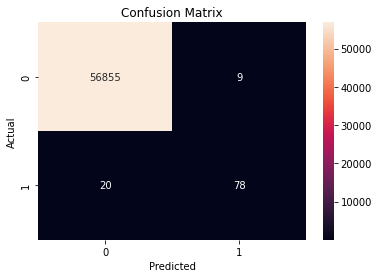

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [16]:
# Use the trained model to predict
new_predictions = best_rf.predict(X)

# Add the predictions back to the original DataFrame
df['Predicted_Class'] = new_predictions

# Filter to get only the fraudulent transactions
fraudulent_transactions = df[df['Predicted_Class'] == 1]

# Display fraudulent transactions
print(fraudulent_transactions)

              V1        V2        V3        V4        V5        V6        V7  \
541    -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
6108   -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
6331    0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060 -1.631735   
6334    0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479 -1.689102   
6336    0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168 -0.812891   
...          ...       ...       ...       ...       ...       ...       ...   
276864 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136 -0.922038   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   

              V8        V9       V10  .